<a href="https://colab.research.google.com/github/Ohsoo46/AIFFEL_QUEST/blob/main/EDA_exan_Seaborn01_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IBM 통신사 고객 정보 데이터셋  
 Q. 최근 한 달 안에 서비스 해지
Python, Seaborn 라이브러리 사용--> 데이터 시각화--> 분석

*   7043  row
*   21 columns wiht 19 features
*   11 missing values





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)
sns.set(style = "white")
df = pd.read_csv('/content/drive/MyDrive/ds6_kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


Impute missing values

*   TatalCharges컬럼:결측값 11
* 가입기간(tenure)dl 0인 고객
* 미납고객-> 결측값(0): impute




In [2]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

1.2 Target variable

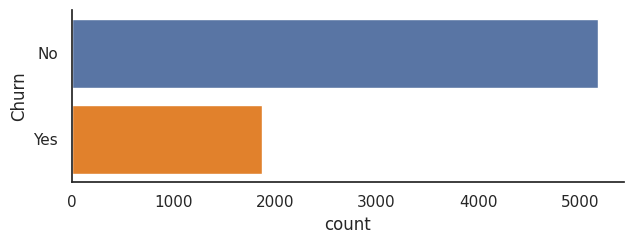

In [5]:
ax = sns.catplot(y= "Churn", kind= "count", data=df, height=2.6, aspect=2.5, orient='h',
                 order = ['No', 'Yes'],
                 palette = {'No': '#4C72B0', 'Yes':'#FF7F0E'})

2. Numerical features


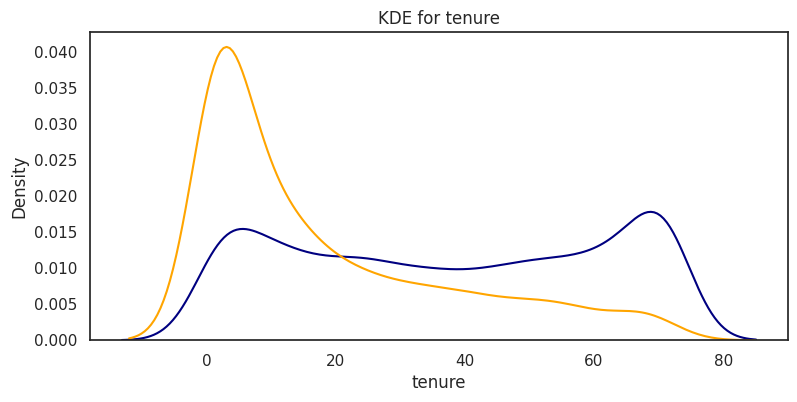

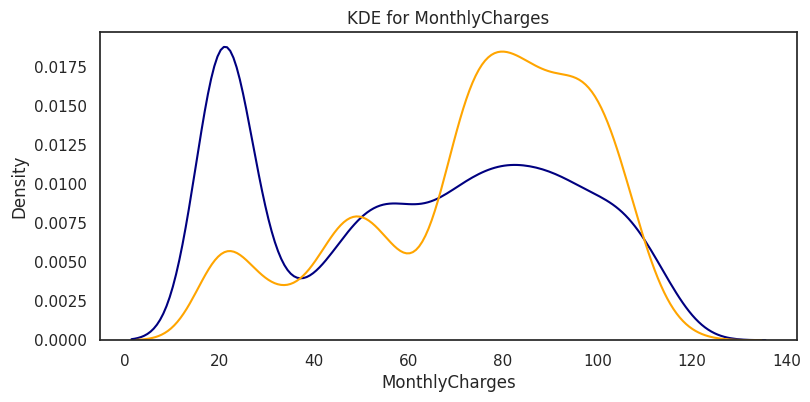

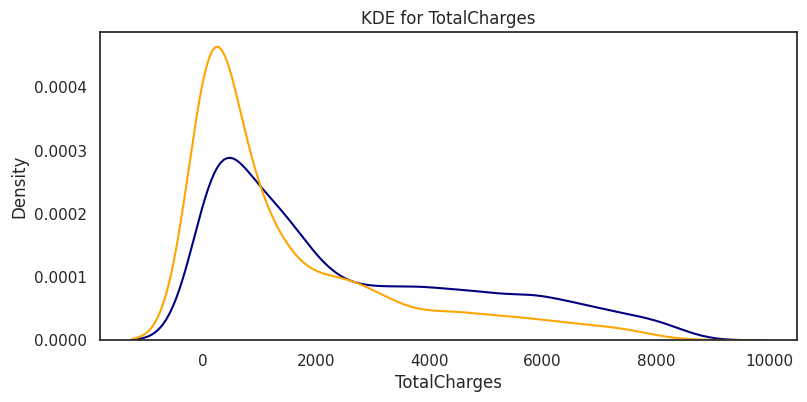

In [9]:
def kdeplot(feature):
    plt.figure(figsize = (9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn:No')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color = 'orange',label = 'Churn:Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')



--> 분석
- 월정액 요금이 높을 수록 고객의 이탈 가능성도 높음
--> 계약 기간과 월정액 요금에 따른 고객 이탈 가능성 고려
- 산점도 필요함

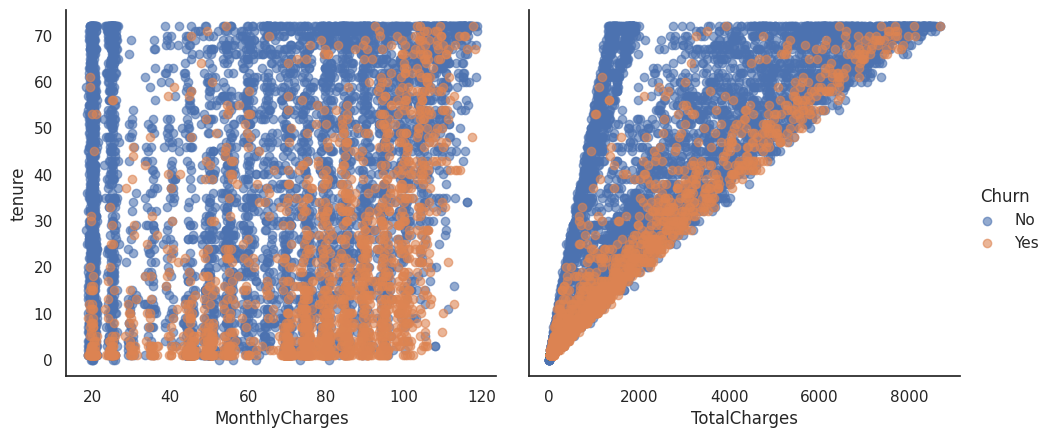

In [10]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

g = sns.PairGrid(
    df,
    y_vars=['tenure'],
    x_vars=['MonthlyCharges', 'TotalCharges'],
    hue='Churn',
    height=4.5, aspect=1.1
)
g.map(plt.scatter, alpha=0.6)
g.add_legend()
plt.show()

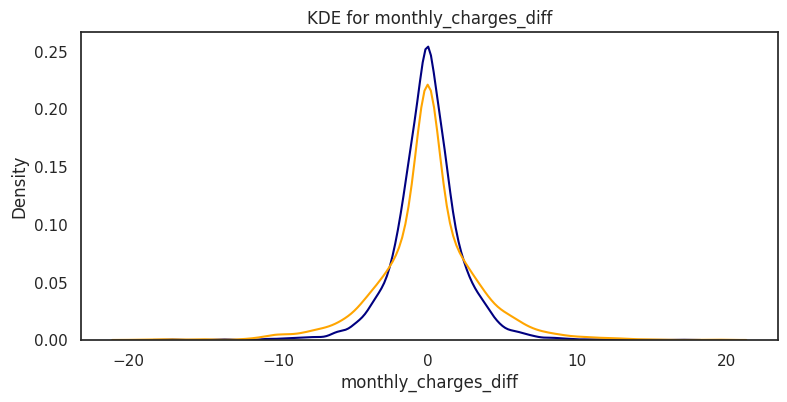

In [11]:
# calculate features
df['total_charges_to_tenure_ratio'] = df['TotalCharges'] / df['tenure']
df['monthly_charges_diff'] = df['MonthlyCharges'] - df['total_charges_to_tenure_ratio']
kdeplot('monthly_charges_diff')

3. Categorical features

In [ ]:
def barplot_percentages(feature, orient = 'v', axis_name = "percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis = 1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x = feature, y = axis_name, hue = 'Churn', data = g, orient = orient)

## Exploratory Analysis with Seaborn

- 기초 데이터 분석(EDA)에 집중할 수 있음
- Seaborn 시각화 기본기를 익힐 수 있음
- 코드가 짧고 구조가 단순
- 전처리의 기본기(결측치, 타입 변환)포함
- IBM Telco Dataset은 초보자용 교재로 자주 사용



| 단계 | 학습 목표 | 키워드 | 해야 할 일 |
| --- | --- | --- | --- |
| 1 | 데이터 구조 이해 | head(), info(), describe() | 각 컬럼의 의미를 직접 표로 정리하기 |
| 2 | 결측치 처리 | isnull(), fillna() | TotalCharges 처리 과정을 학습하며 주석 추가 |
| 3 | EDA 시각화 | sns.countplot / sns.boxplot | 각 그래프 밑에 ‘나의 해석 한줄 ‘주석 달기 |
| 4 | 상관관계 파악 | corr(), heatmap | tenure, MonthlyCharges, TotalCharges 관계 분석 |
| 5 | 간단한 인사이트 서술 |  | 고객 이탈에 영향을 주는 변수 3개를 정리 |

kaggle